**Objetivo**



1. Gerar proteínas a partir de uma sequência inicial usando o modelo ProtGPT2
2. Store sequences in a fasta file.
3. Alinhamento das proteínas geradas





In [ ]:
!pip install transformers torch datasets

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

-----------

[ProtGPT2](https://huggingface.co/nferruz/ProtGPT2)


**What is ProtGPT2?**


ProtGPT2 is a special type of artificial intelligence (AI) model designed to understand and generate protein sequences. Think of it as a language model, like those used to generate text, but instead of words, it works with the “language” of proteins.

**Protein Language:**

Proteins are made up of **sequences of amino acids**, similar to how sentences are made up of words.
ProtGPT2 learns the patterns and structures in these sequences, allowing it to generate new, realistic protein sequences.


**How It Works:**

ProtGPT2 is based on the GPT-2 architecture, which is a type of Transformer model.
It was **trained on millions of protein sequences, learning to predict the next amino acid in a sequence**, much like predicting the next word in a sentence1.

Applications:

* De Novo Protein Design: Creating entirely new proteins that could be used in medicine, industry, or research.
* Understanding Protein Structures: Helping scientists understand how proteins fold and function.
* Biotechnology: Designing proteins with specific functions, like enzymes that break down pollutants or

In [ ]:
!pip install "transformers[torch]" biopython pymsaviz py3Dmol #> /dev/null
!apt-get install muscle #&> /dev/null

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
muscle is already the newest version (1:3.8.1551-2build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
# import dependencies
import transformers
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
from Bio.Align.Applications import MuscleCommandline
from Bio import AlignIO
import requests
import py3Dmol
from pymsaviz import MsaViz, get_msa_testdata
import os
import time
import re

In [ ]:
from transformers import pipeline

In [ ]:
#Set up working directories and download files/checkpoints
!mkdir protT5 # directory for storing checkpoints, results etc
!mkdir protT5/output # directory for storing sequences

mkdir: cannot create directory ‘protT5’: File exists
mkdir: cannot create directory ‘protT5/output’: File exists


In [ ]:
# path variables
output_path = './protT5/output'

In [ ]:
from google.colab import userdata
# Retrieve the token from Colab Secrets
hf_token = userdata.get('HF_TOKEN')

import os
# Set it as an environment variable
os.environ['HF_TOKEN'] = hf_token

**1: Generating de novo proteins in a zero-shot fashion**

In the example below, ProtGPT2 generates sequences that follow the amino acid 'M'. Any other amino acid, oligomer, fragment, or protein of choice can be selected instead. The model will generate the most probable sequences that follow the input. Alternatively, the input field can also be left empty and it will choose the starting tokens.

In [ ]:
protgpt2 = pipeline('text-generation', model="nferruz/ProtGPT2")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
starting_sequence = "MKTAYIAKQRQISFVKSHFSRQDILDLWIYHTQGYFPDWQNYG"

In [ ]:
#generate sequences
sequences = protgpt2(starting_sequence,
                     min_length=len(starting_sequence),
                     max_length=60,
                     num_return_sequences=10,
                     batch_size=1)
# sequences = protgpt2(start_sequence, max_length=50, num_return_sequences=5)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


In [ ]:
for seq in sequences:
  print(seq)

{'generated_text': 'MIQEKDKYVVASVTILESNQ\nDITRLMQTIHQKPGIIEAQLTAGDWNLLIHIVANNMAELNSVIFQKLSQFSGIKDTVTQL\nVLRTIKTDNSLPVDGQNKIPVTETHHNLSGGGNTSESSICARNINNEKRLVRIDGMCHCG\nRNRLGKNCTETC'}
{'generated_text': 'MIQEKDKYVVASVTILESNQHEV\nTLTFSDMEETVLPGMFVKAQIVLRQEDKVLLIPSNAIQERANQQLVLVIKDKIAEYSYVK\nTGASYGVEVEIVSGVQVGELVLAKSLQGLRNGSQINIVDEK\n'}
{'generated_text': 'MIQEKDKYVVASVTILESNQ\nDVVTAIKEEMTSLSKGETHYFGVPLCLYRGLEKLKAKKEEDKQDKEQNDISKRLFDFIKN\nDKEKVSPSTKEVSQLLQHLHAISIGNSEIVSRDTKIGLWKEVFESEIELYNQSENGKEGC\nQALIFHGFG'}
{'generated_text': 'MIQEKDKYVVASVTILESNQKYFVLCSRQ\nISQALKPYWAQMVFEGQTCSTASWTNLTGGFSGSFSSATHEYGLTMKLRVGSKCSYVEPG\nSVGDFTASLRYIPSKEIMIDQVRLDHLSNGNDGTVSFENITLNGTVLRKGMCNYEL'}
{'generated_text': 'MIQEKDKYVVASVTILESNQ\nFEQHIIFKLYMGEKKVISREVVLPKEVLRKRVYPTNLKKIFIHAYQKNKACLGVSRVRLQ\nALLMDKAAENYLTEEQIMQAFIRSNRLHSELEVMQRSKSNQSKINNSIEDSGEDEINEDD\nIVSDY'}
{'generated_text': 'MIQEKDKYVVASVTILESNQLLHQPFTCTFGRVVAWIMSEDGLEIRFN\nINGSPHVQESWVRMEPHTLGTDHFWYKHYSETSWKCPMPSGLHRITFEAFNDDGMLACDS\nFTLKVKSMRN

**2. Store sequences in a fasta file.**

FASTA file format is commonly used for storing biological sequence data such as amino acids or nucleotide sequences.



In [ ]:
# fasta file name and path
fastaname = f'escolabio.fa'
output_path = './protT5/output'
fastapath = os.path.join(output_path, fastaname)

# init list
records = []

# for every sequence we generated
for idx, sequence in enumerate(sequences):

    # create a Seq record
    record = SeqRecord(Seq(sequence['generated_text'].replace('\n', '')),
                       id=str(idx),
                       name="escolabio" +"_"+ str(idx),
                       description="ProtGPT2 generated sequence from " + starting_sequence)

    # then append to the list
    records.append(record)

# write them to the fasta file
with open(fastapath, "w") as output_handle:
    SeqIO.write(records, output_handle, "fasta")

NameError: name 'os' is not defined

**3. Generating alignment**

MUSCLE (Multiple Sequence Comparison by Log-Expectation) is a widely used tool for generating multiple sequence alignments.

Sequence alignment is a method used in bioinformatics to arrange sequences of DNA, RNA, or proteins to identify regions of similarity. These similarities can indicate functional, structural, or evolutionary relationships between the sequences.

In [ ]:
# creating alignment file path
fastaname_aligned = fastapath.replace(".fa", "_aligned.aln")

# using MUSCLE to genrate alignment
align_muscle = MuscleCommandline(input=fastapath, out=fastaname_aligned)
stdout, stderr = align_muscle()
alignment = AlignIO.read(fastaname_aligned, "fasta")

# write to disk
with open(fastaname_aligned, 'w') as output_handle:
    AlignIO.write(alignment, output_handle, "fasta")

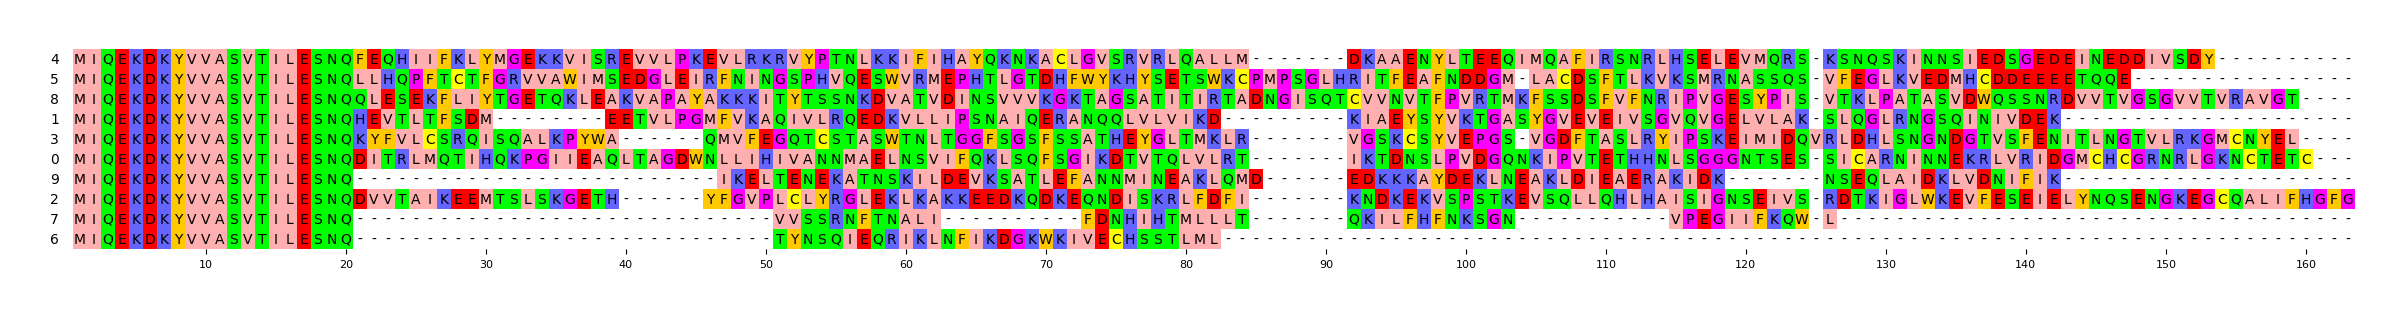

In [ ]:
# visualize the alignments
mv = MsaViz(alignment)
fig = mv.plotfig()

**4. Predicting Structure using ESMFold**


We will use the ESM Metagenomic Atlas, which provides an API that folds a given protein amino acid sequence with ESMFold (esm.pretrained.esmfold_v1) and returns the predicted structure in PDB file format.

In [ ]:
headers = {
        'Content-Type': 'application/x-www-form-urlencoded',
    }

# initiate list
pdb_files = []

for record in records:

    # get the sequence as a string
    sequence = str(record.seq)
    name = record.name

    # use API
    response = requests.post('https://api.esmatlas.com/foldSequence/v1/pdb/', headers=headers, data=sequence, verify=False)
    pdb_string = response.content.decode('utf-8')

    # verbose, response of 200 means success
    print(sequence, response)

    # adding time delay as to not overwhelm the server (increase this to encounter less 500 responses)
    time.sleep(1)

    # filename and path
    pdb_filename = f'{name}.pdb'
    pdb_path = os.path.join(output_path, pdb_filename)

    # save the pdb files
    with open(pdb_path, 'w') as f:
        f.write(pdb_string)

    # append filenames to list for later
    pdb_files.append(pdb_path)

MIQEKDKYVVASVTILESNQDITRLMQTIHQKPGIIEAQLTAGDWNLLIHIVANNMAELNSVIFQKLSQFSGIKDTVTQLVLRTIKTDNSLPVDGQNKIPVTETHHNLSGGGNTSESSICARNINNEKRLVRIDGMCHCGRNRLGKNCTETC <Response [200]>
MIQEKDKYVVASVTILESNQHEVTLTFSDMEETVLPGMFVKAQIVLRQEDKVLLIPSNAIQERANQQLVLVIKDKIAEYSYVKTGASYGVEVEIVSGVQVGELVLAKSLQGLRNGSQINIVDEK <Response [200]>
MIQEKDKYVVASVTILESNQDVVTAIKEEMTSLSKGETHYFGVPLCLYRGLEKLKAKKEEDKQDKEQNDISKRLFDFIKNDKEKVSPSTKEVSQLLQHLHAISIGNSEIVSRDTKIGLWKEVFESEIELYNQSENGKEGCQALIFHGFG <Response [200]>
MIQEKDKYVVASVTILESNQKYFVLCSRQISQALKPYWAQMVFEGQTCSTASWTNLTGGFSGSFSSATHEYGLTMKLRVGSKCSYVEPGSVGDFTASLRYIPSKEIMIDQVRLDHLSNGNDGTVSFENITLNGTVLRKGMCNYEL <Response [200]>
MIQEKDKYVVASVTILESNQFEQHIIFKLYMGEKKVISREVVLPKEVLRKRVYPTNLKKIFIHAYQKNKACLGVSRVRLQALLMDKAAENYLTEEQIMQAFIRSNRLHSELEVMQRSKSNQSKINNSIEDSGEDEINEDDIVSDY <Response [200]>
MIQEKDKYVVASVTILESNQLLHQPFTCTFGRVVAWIMSEDGLEIRFNINGSPHVQESWVRMEPHTLGTDHFWYKHYSETSWKCPMPSGLHRITFEAFNDDGMLACDSFTLKVKSMRNASSQSVFEGLKVEDMHCDDEEEETQQE <Response [200]>
MIQEKDKYVVASVTILESNQTYNSQIEQRIKL

In [ ]:
# visualize each pdb file retrieved from ESMfold using py3Dmol
for pdb_file in pdb_files:

    # get index
    seq_idx = int(re.findall(r'\d+', pdb_file)[-1])
    # get filename with no ext
    filename = re.findall(fr'escolabio_\d+', pdb_file)
    print(f"Showing structure: {filename}")
    # retrieve sequences
    print(f"Sequence: {records[seq_idx].seq}")

    # generate viz
    view=py3Dmol.view()
    view.addModel(open(pdb_file, 'r').read(),'pdb')
    view.zoomTo()
    view.setBackgroundColor('white')
    #Here we set the visualization style for chain B and C
    view.setStyle({'cartoon': {'color':'yellow'}})
    view.show()

Showing structure: ['escolabio_0']
Sequence: MIQEKDKYVVASVTILESNQDITRLMQTIHQKPGIIEAQLTAGDWNLLIHIVANNMAELNSVIFQKLSQFSGIKDTVTQLVLRTIKTDNSLPVDGQNKIPVTETHHNLSGGGNTSESSICARNINNEKRLVRIDGMCHCGRNRLGKNCTETC


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Showing structure: ['escolabio_1']
Sequence: MIQEKDKYVVASVTILESNQHEVTLTFSDMEETVLPGMFVKAQIVLRQEDKVLLIPSNAIQERANQQLVLVIKDKIAEYSYVKTGASYGVEVEIVSGVQVGELVLAKSLQGLRNGSQINIVDEK


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Showing structure: ['escolabio_2']
Sequence: MIQEKDKYVVASVTILESNQDVVTAIKEEMTSLSKGETHYFGVPLCLYRGLEKLKAKKEEDKQDKEQNDISKRLFDFIKNDKEKVSPSTKEVSQLLQHLHAISIGNSEIVSRDTKIGLWKEVFESEIELYNQSENGKEGCQALIFHGFG


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Showing structure: ['escolabio_3']
Sequence: MIQEKDKYVVASVTILESNQKYFVLCSRQISQALKPYWAQMVFEGQTCSTASWTNLTGGFSGSFSSATHEYGLTMKLRVGSKCSYVEPGSVGDFTASLRYIPSKEIMIDQVRLDHLSNGNDGTVSFENITLNGTVLRKGMCNYEL


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Showing structure: ['escolabio_4']
Sequence: MIQEKDKYVVASVTILESNQFEQHIIFKLYMGEKKVISREVVLPKEVLRKRVYPTNLKKIFIHAYQKNKACLGVSRVRLQALLMDKAAENYLTEEQIMQAFIRSNRLHSELEVMQRSKSNQSKINNSIEDSGEDEINEDDIVSDY


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Showing structure: ['escolabio_5']
Sequence: MIQEKDKYVVASVTILESNQLLHQPFTCTFGRVVAWIMSEDGLEIRFNINGSPHVQESWVRMEPHTLGTDHFWYKHYSETSWKCPMPSGLHRITFEAFNDDGMLACDSFTLKVKSMRNASSQSVFEGLKVEDMHCDDEEEETQQE


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Showing structure: ['escolabio_6']
Sequence: MIQEKDKYVVASVTILESNQTYNSQIEQRIKLNFIKDGKWKIVECHSSTLML


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Showing structure: ['escolabio_7']
Sequence: MIQEKDKYVVASVTILESNQVVSSRNFTNALIFDNHIHTMLLLTQKILFHFNKSGNVPEGIIFKQWL


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Showing structure: ['escolabio_8']
Sequence: MIQEKDKYVVASVTILESNQQLESEKFLIYTGETQKLEAKVAPAYAKKKITYTSSNKDVATVDINSVVVKGKTAGSATITIRTADNGISQTCVVNVTFPVRTMKFSSDSFVFNRIPVGESYPISVTKLPATASVDWQSSNRDVVTVGSGVVTVRAVGT


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Showing structure: ['escolabio_9']
Sequence: MIQEKDKYVVASVTILESNQIKELTENEKATNSKILDEVKSATLEFANNMINEAKLQMDEDKKKAYDEKLNEAKLDIEAERAKIDKNSEQLAIDKLVDNIFIK


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

**4. Analyze the sequence**

In [ ]:
# Load the ProLLaMA model
prollama = pipeline('text-generation', model="GreatCaptainNemo/ProLLaMA")

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# Input protein sequence
input_sequence = "MKTAYIAKQRQISFVKSHFSRQDILDLWIYHTQGYFPDWQNYG"

In [ ]:
# Analyze the sequence and suggest mutations
analysis = prollama(f"Analyze the sequence: {input_sequence} and suggest mutations to increase stability.")

In [ ]:
# Print the analysis and suggested mutations
print("Analysis and Suggested Mutations:")
print(analysis[0]['generated_text'])